In [1]:
%matplotlib inline
import sys
print('Python Version: {}'.format(sys.version))

import pandas as pd
print('pandas version: {}'.format(pd.__version__))

import matplotlib
print('matplotlib version: {}'.format(matplotlib.__version__))

import numpy as np
print('numpy version: {}'.format(np.__version__))

import scipy as sp
print('scipy version: {}'.format(sp.__version__))

import IPython
print('ipython version: {}'.format(IPython.__version__))

import sklearn
print('scikit-learn version: {}'.format(sklearn.__version__))

import mglearn

Python Version: 3.5.3 |Anaconda custom (x86_64)| (default, Mar  6 2017, 12:15:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
pandas version: 0.20.3
matplotlib version: 2.0.2
numpy version: 1.13.1
scipy version: 0.19.1
ipython version: 6.0.0
scikit-learn version: 0.18.2


X.shape: (26, 2)


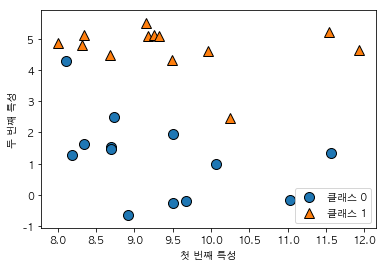

In [9]:
import matplotlib
import matplotlib.pyplot as plt

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rcParams["font.family"] = 'AppleGothic'

X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['클래스 0', '클래스 1'], loc=4)
plt.xlabel('첫 번째 특성')
plt.ylabel('두 번째 특성')
print('X.shape: {}'.format(X.shape))

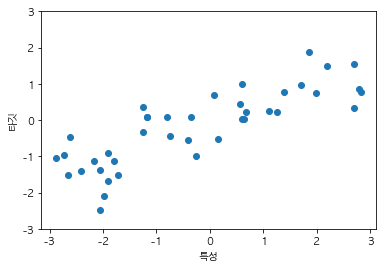

In [10]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('특성')
plt.ylabel('타깃')

In [11]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print('cancer.keys(): {}'.format(cancer.keys()))

cancer.keys(): dict_keys(['DESCR', 'target_names', 'target', 'feature_names', 'data'])


In [12]:
print('유방암 데이터의 형태: {}'.format(cancer.data.shape))

유방암 데이터의 형태: (569, 30)


In [13]:
print('클래스별 샘플 개수:\n{}'.format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 개수:
{'benign': 357, 'malignant': 212}


In [15]:
print('특성 이름:\n{}'.format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [16]:
from sklearn.datasets import load_boston

boston = load_boston()
print('데이터의 형태: {}'.format(boston.data.shape))

데이터의 형태: (506, 13)


In [17]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape: {}'.format(X.shape))

X.shape: (506, 104)


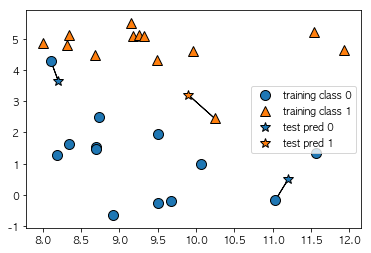

In [18]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

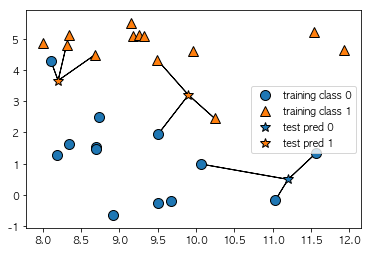

In [19]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [20]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [22]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [23]:
print('테스트 세트 예측: {}'.format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [25]:
print('테스트 세트 정확도: {:.3f}'.format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.857


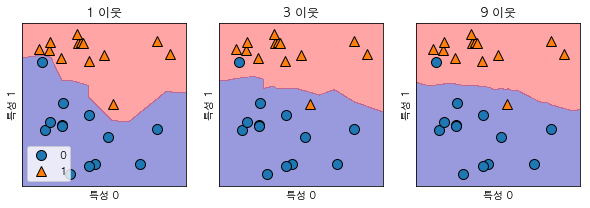

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{} 이웃'.format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend(loc=3)

In [27]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

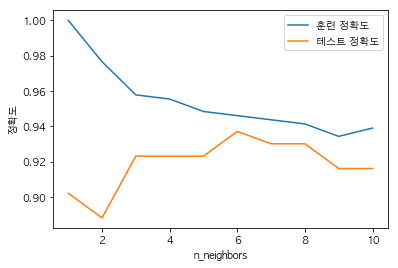

In [28]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()

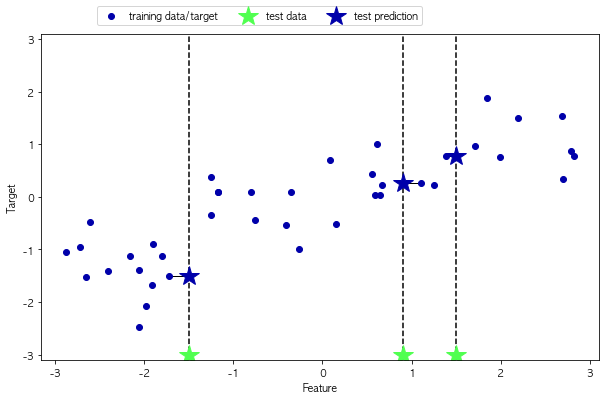

In [29]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

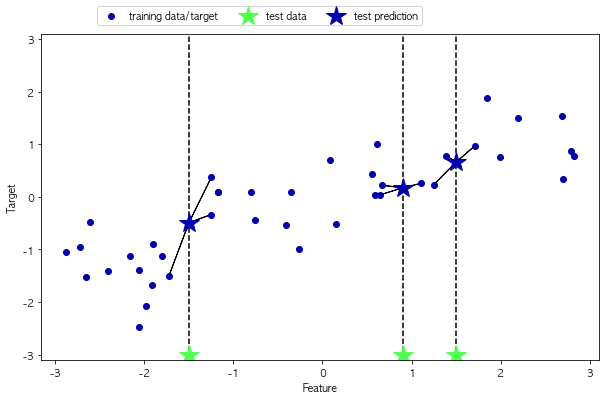

In [30]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [31]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [38]:
print('테스트 세트 예측: {}'.format(reg.predict(X_test)))

테스트 세트 예측: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [39]:
print('테스트 세트 R^2: {:.3f}'.format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.834


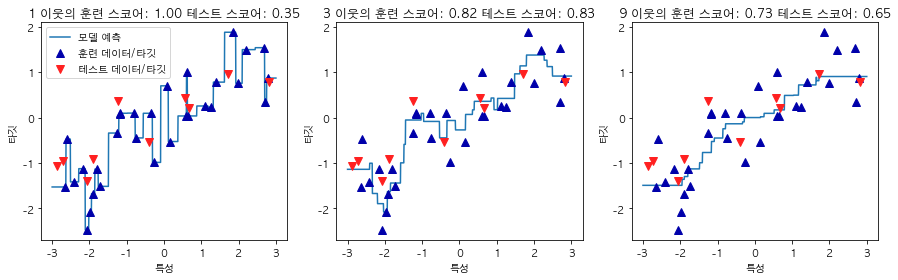

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        '{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}'.format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)
        )
    )
    ax.set_xlabel('특성')
    ax.set_ylabel('타깃')
axes[0].legend(['모델 예측','훈련 데이터/타깃', '테스트 데이터/타깃'], loc='best')